In [1]:
# Bibliotecas utilizadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Datasets utilizados
df_majors = pd.read_csv('./data/Mens_Tennis_Grand_Slam_Winner.csv')
df_ATP_1973_to_2010 = pd.read_csv('./data/df_ATP_1973_to_2010.csv')

# Dataset - Ganadores 4 Grand Slams

In [3]:
df_majors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         292 non-null    int64  
 1   TOURNAMENT                   292 non-null    object 
 2   WINNER                       292 non-null    object 
 3   RUNNER-UP                    292 non-null    object 
 4   WINNER_NATIONALITY           292 non-null    object 
 5   WINNER_ATP_RANKING           63 non-null     float64
 6   RUNNER-UP_ATP_RANKING        64 non-null     float64
 7   WINNER_LEFT_OR_RIGHT_HANDED  292 non-null    object 
 8   TOURNAMENT_SURFACE           292 non-null    object 
 9   WINNER_PRIZE                 217 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 22.9+ KB


In [4]:
# Convertir nombres 
def convertir_nombre(nombre):
    partes = nombre.split()
    inicial = partes[0][0]  # Primera letra del primer nombre
    apellido = partes[-1]  # Apellido
    return f'{inicial}. {apellido}'

In [5]:
df_majors['WINNER'] = df_majors['WINNER'].apply(convertir_nombre)
df_majors['RUNNER-UP'] = df_majors['RUNNER-UP'].apply(convertir_nombre)

df_majors

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2022,U.S. Open,C. Alcaraz,C. Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,NaN,25.0,right,Grass / Outdoor,2507460.0
3,2022,French Open,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0
...,...,...,...,...,...,...,...,...,...,...
287,1951,Australian Open,D. Savitt,K. McGregor,American,NaN,NaN,right,Grass,NaN
288,1950,U.S. Open,A. Larsen,H. Flam,American,NaN,NaN,right,outdoors,NaN
289,1950,Wimbledon,J. Patty,F. Sedgman,American,NaN,NaN,right,Grass / Outdoor,NaN
290,1950,French Open,B. Patty,J. Drobny,American,NaN,NaN,right,Clay,NaN


In [6]:
nulos = (df_majors.isnull().mean())*100
nulos

YEAR                            0.000000
TOURNAMENT                      0.000000
WINNER                          0.000000
RUNNER-UP                       0.000000
WINNER_NATIONALITY              0.000000
WINNER_ATP_RANKING             78.424658
RUNNER-UP_ATP_RANKING          78.082192
WINNER_LEFT_OR_RIGHT_HANDED     0.000000
TOURNAMENT_SURFACE              0.000000
WINNER_PRIZE                   25.684932
dtype: float64

In [7]:
df_majors.value_counts

<bound method DataFrame.value_counts of      YEAR       TOURNAMENT       WINNER     RUNNER-UP WINNER_NATIONALITY  \
0    2023  Australian Open  N. Djokovic  S. Tsitsipas            Serbian   
1    2022        U.S. Open   C. Alcaraz       C. Rudd            Spanish   
2    2022        Wimbledon  N. Djokovic    N. Kyrgios            Serbian   
3    2022      French Open     R. Nadal       C. Rudd            Spanish   
4    2022  Australian Open     R. Nadal   D. Medvedev            Spanish   
..    ...              ...          ...           ...                ...   
287  1951  Australian Open    D. Savitt   K. McGregor           American   
288  1950        U.S. Open    A. Larsen       H. Flam           American   
289  1950        Wimbledon     J. Patty    F. Sedgman           American   
290  1950      French Open     B. Patty     J. Drobny           American   
291  1950  Australian Open   F. Sedgman   K. McGregor         Australian   

     WINNER_ATP_RANKING  RUNNER-UP_ATP_RANKING 

In [8]:
df_majors.head()

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2022,U.S. Open,C. Alcaraz,C. Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,NaN,25.0,right,Grass / Outdoor,2507460.0
3,2022,French Open,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0


In [9]:
# Columnas con nulos 
df_majors[['WINNER_ATP_RANKING','RUNNER-UP_ATP_RANKING', 'WINNER_PRIZE']]

,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_PRIZE
0,1.0,3.0,2050000.0
1,2.0,5.0,2600000.0
2,NaN,25.0,2507460.0
3,5.0,8.0,1870000.0
4,5.0,2.0,4400000.0
...,...,...,...
287,NaN,NaN,NaN
288,NaN,NaN,NaN
289,NaN,NaN,NaN
290,NaN,NaN,NaN


In [10]:
# Cambio de Australian Open (Dec / Jan) por Australian Open
df_majors['TOURNAMENT'] = df_majors['TOURNAMENT'].str.replace(r'Australian Open \(Dec\)|Australian Open \(Jan\)', 'Australian Open', regex = True)
df_majors['TOURNAMENT'] = df_majors['TOURNAMENT'].str.replace(r'French Open', 'Roland Garros', regex = True)

In [11]:
df_majors['TOURNAMENT'].value_counts()

TOURNAMENT
Australian Open    74
U.S. Open          73
Roland Garros      73
Wimbledon          72
Name: count, dtype: int64

In [12]:
# Media de WINNER_PRIZE de cada uno de los torneos
precios_por_torneo = df_majors.groupby('TOURNAMENT')['WINNER_PRIZE'].mean()
precios_por_torneo

TOURNAMENT
Australian Open    1.156032e+06
Roland Garros      1.466629e+06
U.S. Open          1.013036e+06
Wimbledon          5.990386e+05
Name: WINNER_PRIZE, dtype: float64

In [13]:
# Medias de cada uno de los torneos
tournament_means = {
    'Australian Open': df_majors.loc[df_majors['TOURNAMENT'].str.contains('Australian Open', case = False), 'WINNER_PRIZE'].mean(),
    'Roland Garros': df_majors.loc[df_majors['TOURNAMENT'].str.contains('Roland Garros', case = False), 'WINNER_PRIZE'].mean(),
    'U.S. Open': df_majors.loc[df_majors['TOURNAMENT'].str.contains('U.S. Open', case = False), 'WINNER_PRIZE'].mean(),
    'Wimbledon': df_majors.loc[df_majors['TOURNAMENT'].str.contains('Wimbledon', case = False), 'WINNER_PRIZE'].mean(),
}
# Funcion reemplazo
def sustitucion_nulos(row):
    tournament = row['TOURNAMENT']
    winner_prize = row['WINNER_PRIZE']
    if pd.isnull(winner_prize) and any(t in tournament for t in tournament_means.key()):
        return tournament_means(next(t for t in tournament_means.key() if t in tournament))
    else:
        return winner_prize
    
df_majors['WINNER_PRIZE'] = df_majors['WINNER_PRIZE'].fillna(df_majors['TOURNAMENT'].map(lambda x: tournament_means[next((t for t in tournament_means.keys() if t in x), None)])).round(1)
df_majors

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2022,U.S. Open,C. Alcaraz,C. Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,NaN,25.0,right,Grass / Outdoor,2507460.0
3,2022,Roland Garros,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0
...,...,...,...,...,...,...,...,...,...,...
287,1951,Australian Open,D. Savitt,K. McGregor,American,NaN,NaN,right,Grass,1156031.7
288,1950,U.S. Open,A. Larsen,H. Flam,American,NaN,NaN,right,outdoors,1013036.4
289,1950,Wimbledon,J. Patty,F. Sedgman,American,NaN,NaN,right,Grass / Outdoor,599038.6
290,1950,Roland Garros,B. Patty,J. Drobny,American,NaN,NaN,right,Clay,1466628.7


In [14]:
# Año 1977 hay un error, 2 Australian Open, elimino el incorrecto
df_majors[df_majors['YEAR'] == 1977]

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
179,1977,Australian Open,V. Gerulaitis,J. Lloyd,American,NaN,NaN,right,Grass,41000.0
180,1977,U.S. Open,G. Vilas,J. Connors,Argentine,NaN,NaN,left,Clay - outdoors,33000.0
181,1977,Wimbledon,B. Borg,J. Connors,Swedish,NaN,NaN,right,Grass / Outdoor,15000.0
182,1977,Roland Garros,G. Vilas,B. Gottfried,Argentine,NaN,NaN,left,Clay,190000.0
183,1977,Australian Open,R. Tanner,G. Vilas,American,NaN,NaN,left,Grass,28000.0


In [15]:
# Elimino duplicado Australian Open (1977)
df_majors = df_majors.drop(179)

# Dataset - Ranking 1973-2010

In [16]:
# Data ranking completo 
df_ATP_1973_to_2010.head()

,Posicion,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,I. Nastase,J. Connors,J. Connors,J. Connors,J. Connors,J. Connors,B. Borg,B. Borg,J. McEnroe,...,R. Nadal,N. Djokovic,R. Federer,N. Djokovic,N. Djokovic,N. Djokovic,N. Djokovic,R. Nadal,R. Nadal,N. Djokovic
1,2,J. Newcombe,J. Newcombe,G. Vilas,B. Borg,B. Borg,B. Borg,J. Connors,J. McEnroe,B. Borg,...,N. Djokovic,R. Nadal,N. Djokovic,R. Nadal,R. Nadal,R. Federer,A. Murray,R. Federer,R. Federer,R. Nadal
2,3,M. Orantes,R. Laver,M. Orantes,G. Vilas,B. Gottfried,G. Vilas,J. McEnroe,J. Connors,J. Connors,...,R. Federer,R. Federer,A. Murray,A. Murray,R. Federer,A. Murray,S. Wawrinka,A. Murray,N. Djokovic,R. Federer
3,4,S. Smith,B. Borg,B. Borg,I. Nastase,G. Vilas,V. Gerulaitis,R. Tanner,G. Vilas,I. Lendl,...,A. Murray,A. Murray,R. Nadal,D. Ferrer,S. Wawrinka,S. Wawrinka,R. Nadal,A. Zverev,J. del Potro,D. Medvedev
4,5,J. Connors,T. Okker,A. Ashe,A. Panatta,M. Orantes,E. Dibbs,V. Gerulaitis,H. Solomon,J. Clerc,...,R. Soderling,D. Ferrer,D. Ferrer,R. Federer,D. Ferrer,T. Berdych,K. Nishikori,M. Cilic,A. Zverev,D. Thiem


In [94]:
# Tranformar df_ATP_1973_to_2010 para que sea mas usable
rankings_long = df_ATP_1973_to_2010.melt(id_vars=['Posicion'], var_name='YEAR', value_name='Player')
rankings_long['YEAR'] = rankings_long['YEAR'].astype(int) 
rankings_long

,Posicion,YEAR,Player
0,1,1973,I. Nastase
1,2,1973,J. Newcombe
2,3,1973,M. Orantes
3,4,1973,S. Smith
4,5,1973,J. Connors
...,...,...,...
4695,96,2019,C. Moutet
4696,97,2019,B. Klahn
4697,98,2019,E. Gerasimov
4698,99,2019,J. Munar


In [18]:
# Crear el diccionario de mapeo
ranking_dict = dict(zip(zip(rankings_long['YEAR'], rankings_long['Player']), rankings_long['Posicion']))

In [19]:
# Función para rellenar los rankings
def fill_ranking(row):
    year = row['YEAR']
    if pd.isna(row['WINNER_ATP_RANKING']) and (year, row['WINNER']) in ranking_dict:
        row['WINNER_ATP_RANKING'] = ranking_dict[(year, row['WINNER'])]
    if pd.isna(row['RUNNER-UP_ATP_RANKING']) and (year, row['RUNNER-UP']) in ranking_dict:
        row['RUNNER-UP_ATP_RANKING'] = ranking_dict[(year, row['RUNNER-UP'])]
    return row

In [20]:
# Aplicar la función a cada fila del dataframe principal
df_majors = df_majors.apply(fill_ranking, axis=1)

In [21]:
df_majors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 291
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         291 non-null    int64  
 1   TOURNAMENT                   291 non-null    object 
 2   WINNER                       291 non-null    object 
 3   RUNNER-UP                    291 non-null    object 
 4   WINNER_NATIONALITY           291 non-null    object 
 5   WINNER_ATP_RANKING           197 non-null    float64
 6   RUNNER-UP_ATP_RANKING        192 non-null    float64
 7   WINNER_LEFT_OR_RIGHT_HANDED  291 non-null    object 
 8   TOURNAMENT_SURFACE           291 non-null    object 
 9   WINNER_PRIZE                 291 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 25.0+ KB


In [22]:
# Elimino filas anteriores a 1973 (ya que no hay datos respecto al ranking ATP)
df_majors = df_majors[df_majors['YEAR'] >= 1973]
print("El año más antiguo en df_majors ahora es:", df_majors['YEAR'].min())

El año más antiguo en df_majors ahora es: 1973


In [23]:
# Cambio manual de nulos (ha habido problemas de lectura por nombres raros)
df_majors.at[2, 'WINNER_ATP_RANKING'] = 3.0
df_majors.at[83, 'WINNER_ATP_RANKING'] = 10.0
df_majors.at[135, 'RUNNER-UP_ATP_RANKING'] = 13.0
df_majors.at[144, 'RUNNER-UP_ATP_RANKING'] = 9.0
df_majors.at[157, 'RUNNER-UP_ATP_RANKING'] = 51.0
df_majors.at[163, 'RUNNER-UP_ATP_RANKING'] = 108.0
df_majors.at[174, 'RUNNER-UP_ATP_RANKING'] = 16.0
df_majors.at[175, 'RUNNER-UP_ATP_RANKING'] = 114.0
df_majors.at[185, 'RUNNER-UP_ATP_RANKING'] = 10.0
df_majors.at[186, 'RUNNER-UP_ATP_RANKING'] = 10.0

In [24]:
df_majors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         199 non-null    int64  
 1   TOURNAMENT                   199 non-null    object 
 2   WINNER                       199 non-null    object 
 3   RUNNER-UP                    199 non-null    object 
 4   WINNER_NATIONALITY           199 non-null    object 
 5   WINNER_ATP_RANKING           199 non-null    float64
 6   RUNNER-UP_ATP_RANKING        199 non-null    float64
 7   WINNER_LEFT_OR_RIGHT_HANDED  199 non-null    object 
 8   TOURNAMENT_SURFACE           199 non-null    object 
 9   WINNER_PRIZE                 199 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 25.2+ KB


In [25]:
df_majors.head()

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2022,U.S. Open,C. Alcaraz,C. Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,3.0,25.0,right,Grass / Outdoor,2507460.0
3,2022,Roland Garros,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0


# ANALISIS

## Hipotesis 1 - Los ganadores siempre son Top 10

In [26]:
precios_por_torneo = df_majors.groupby('TOURNAMENT')['WINNER_PRIZE'].mean()

In [27]:
ganadores_torneos = df_majors.groupby('TOURNAMENT')['WINNER_ATP_RANKING'].mean().round(1)
ganadores_torneos

TOURNAMENT
Australian Open    4.7
Roland Garros      3.1
U.S. Open          2.4
Wimbledon          2.6
Name: WINNER_ATP_RANKING, dtype: float64

In [28]:
# Agrupa por 'TOURNAMENT' y obtiene todos los rankings ATP de los ganadores
rankings_por_torneo = df_majors.groupby('TOURNAMENT')['WINNER_ATP_RANKING'].apply(list)

# Imprimir los rankings de cada torneo
rankings_por_torneo

TOURNAMENT
Australian Open    [1.0, 5.0, 1.0, 1.0, 2.0, 3.0, 2.0, 2.0, 1.0, ...
Roland Garros      [5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 4.0, 3.0, ...
U.S. Open          [2.0, 2.0, 3.0, 1.0, 1.0, 1.0, 4.0, 1.0, 9.0, ...
Wimbledon          [3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 4.0, ...
Name: WINNER_ATP_RANKING, dtype: object

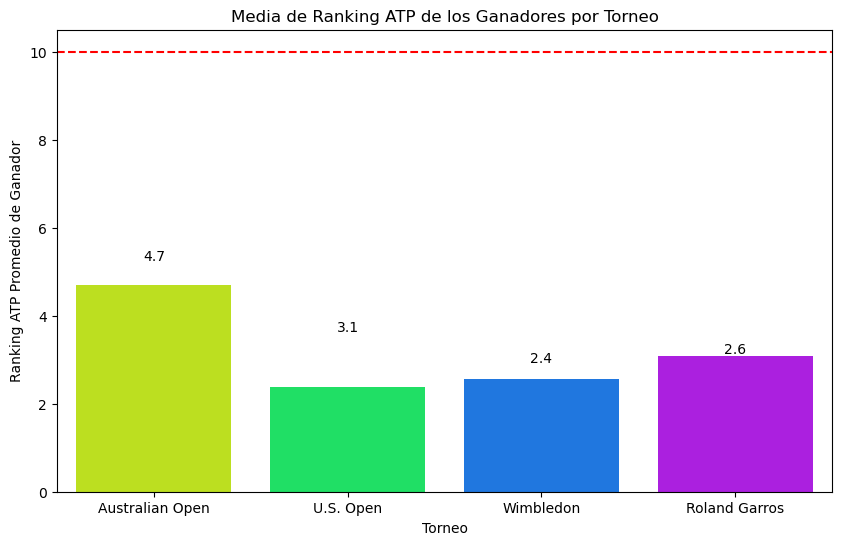

In [29]:
plt.figure(figsize=(10, 6))

# Número de torneos únicos para generar colores distintos
num_tournaments = df_majors['TOURNAMENT'].nunique()

# Color distinto para cada torneo
palette = sns.color_palette("hsv", num_tournaments)

# Reemplaza `ci=None` por `errorbar=None`
barplot = sns.barplot(x='TOURNAMENT', y='WINNER_ATP_RANKING', data=df_majors, errorbar=None, palette=palette)

# Texto sobre cada barra
for index, row in df_majors.groupby('TOURNAMENT')['WINNER_ATP_RANKING'].mean().reset_index().iterrows():
    barplot.text(index, row['WINNER_ATP_RANKING'] + 0.5,  
                 round(row['WINNER_ATP_RANKING'], 1), color='black', ha="center", va='bottom')

# Línea horizontal para el umbral del Top 10
plt.axhline(y=10, color='red', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('Torneo')
plt.ylabel('Ranking ATP Promedio de Ganador')
plt.title('Media de Ranking ATP de los Ganadores por Torneo')

plt.show()

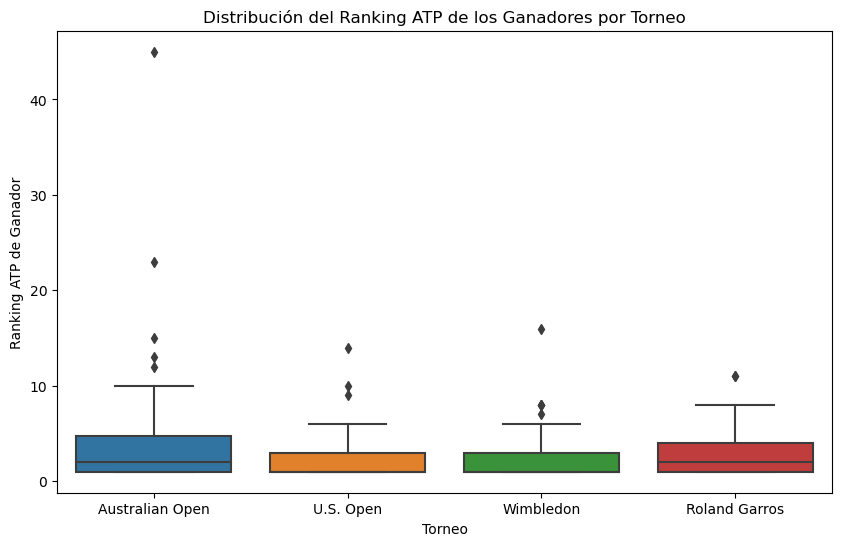

In [30]:
plt.figure(figsize=(10, 6))

# Crea el boxplot
sns.boxplot(x = 'TOURNAMENT', y = 'WINNER_ATP_RANKING', data = df_majors)

# Configura las etiquetas y título del gráfico
plt.xlabel('Torneo')
plt.ylabel('Ranking ATP de Ganador')
plt.title('Distribución del Ranking ATP de los Ganadores por Torneo')

# Muestra el gráfico
plt.show()

In [31]:
# Calcular Q1 y Q3
Q1 = df_majors['WINNER_ATP_RANKING'].quantile(0.25)
Q3 = df_majors['WINNER_ATP_RANKING'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_majors[(df_majors['WINNER_ATP_RANKING'] < lower_bound) | (df_majors['WINNER_ATP_RANKING'] > upper_bound)]

# Ordenar los outliers por 'TOURNAMENT'
outliers_sorted = outliers.sort_values(by='TOURNAMENT')

In [32]:
outliers_sorted

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
83,2002,Australian Open,T. Johannson,M. Safin,Swedish,10.0,4.0,right,Rebound Ace,1000000.0
147,1985,Australian Open,S. Edberg,M. Wilander,Swedish,9.0,3.0,right,Grass,100000.0
159,1982,Australian Open,J. Kriek,S. Denton,American,13.0,15.0,right,Grass,77500.0
163,1981,Australian Open,J. Kriek,S. Denton,American,15.0,108.0,right,Grass,72000.0
167,1980,Australian Open,B. Teacher,K. Warwick,American,23.0,38.0,right,Grass,64000.0
183,1977,Australian Open,R. Tanner,G. Vilas,American,12.0,4.0,left,Grass,28000.0
187,1976,Australian Open,M. Edmondson,J. Newcombe,Australian,45.0,21.0,right,Grass,8156.0
102,1997,Roland Garros,G. Kuerten,S. Bruguera,Brazilian,11.0,6.0,right,Clay,3668000.0
162,1982,Roland Garros,M. Wilander,G. Vilas,Swedish,11.0,4.0,right,Clay,400000.0
32,2014,U.S. Open,M. Cilic,K. Nishikori,Croatian,9.0,5.0,right,DecoTurf - outdoors,3000000.0


#### En Wimbledon y Roland Garros destacan por tener los ganadores que usualmente estan clasificaods mas altos. US Open y Australian Open son menos predecibles, tienen una gama de ganadores mas amplia con respecto al ranking. 
A pesar de que en el Wimbledon y Roland Garros haya mayor prevision de ganadores mejor clasificados, tambien hay mas valores atipicos, es decir el tenis tiene un enorme potencial para dar sorpresas y posibilitar que cualquier "no favorito" consiga ganar un major.

## Hipotesis 2 - El ganador de un año repite el siguiente año como ganador 

In [33]:
# Crear un DataFrame con los ganadores y el número de veces que han ganado cada torneo.
winner_counts = df_majors.groupby(['TOURNAMENT', 'WINNER']).size().reset_index(name='COUNTS')
winner_counts

,TOURNAMENT,WINNER,COUNTS
0,Australian Open,A. Agassi,4
1,Australian Open,B. Becker,2
2,Australian Open,B. Teacher,1
3,Australian Open,G. Vilas,2
4,Australian Open,I. Lendl,2
...,...,...,...
83,Wimbledon,P. Sampras,7
84,Wimbledon,R. Federer,8
85,Wimbledon,R. Krajicek,1
86,Wimbledon,R. Nadal,2


In [34]:
# Filtrar para obtener solo las entradas donde un jugador ha ganado un torneo más de una vez.
repeated_winners = winner_counts[winner_counts['COUNTS'] > 1]
repeated_winners

,TOURNAMENT,WINNER,COUNTS
0,Australian Open,A. Agassi,4
1,Australian Open,B. Becker,2
3,Australian Open,G. Vilas,2
4,Australian Open,I. Lendl,2
6,Australian Open,J. Courier,2
7,Australian Open,J. Kriek,2
8,Australian Open,J. Newcombe,2
11,Australian Open,M. Wilander,3
12,Australian Open,N. Djokovic,10
14,Australian Open,P. Sampras,2


In [35]:
# Contar el número total de torneos repetidos ganados por cada jugador.
total_repeated_wins = repeated_winners.groupby('WINNER')['COUNTS'].sum().reset_index()
total_repeated_wins

,WINNER,COUNTS
0,A. Agassi,6
1,A. Murray,2
2,B. Becker,5
3,B. Borg,11
4,G. Kuerten,3
5,G. Vilas,2
6,I. Lendl,8
7,J. Connors,7
8,J. Courier,4
9,J. Kriek,2


In [53]:
# Ordenar los jugadores por el número total de torneos repetidos ganados
top_repeated_winners = total_repeated_wins.sort_values(by = 'COUNTS', ascending=False).head(10)
top_repeated_winners

,WINNER,COUNTS
17,R. Nadal,22
13,N. Djokovic,22
16,R. Federer,19
15,P. Sampras,14
3,B. Borg,11
6,I. Lendl,8
10,J. McEnroe,7
7,J. Connors,7
12,M. Wilander,6
0,A. Agassi,6


In [37]:
# Filtrar el DataFrame original para incluir solo esos 10 jugadores.
df_top_winners = df_majors[df_majors['WINNER'].isin(top_repeated_winners['WINNER'])]
df_top_winners

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,N. Djokovic,S. Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
2,2022,Wimbledon,N. Djokovic,N. Kyrgios,Serbian,3.0,25.0,right,Grass / Outdoor,2507460.0
3,2022,Roland Garros,R. Nadal,C. Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,R. Nadal,D. Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0
6,2021,Wimbledon,N. Djokovic,M. Berrettini,Serbian,1.0,7.0,right,Grass / Outdoor,1700000.0
...,...,...,...,...,...,...,...,...,...,...
190,1975,Roland Garros,B. Borg,G. Vilas,Swedish,4.0,2.0,right,Clay,120000.0
192,1974,U.S. Open,J. Connors,K. Rosewall,American,1.0,7.0,left,outdoors,22500.0
193,1974,Wimbledon,J. Connors,K. Rosewall,American,1.0,7.0,left,Grass / Outdoor,10000.0
194,1974,Roland Garros,B. Borg,M. Orantes,Swedish,4.0,13.0,right,Clay,120000.0


C:\Users\admin\AppData\Local\Temp\ipykernel_7772\4100298811.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


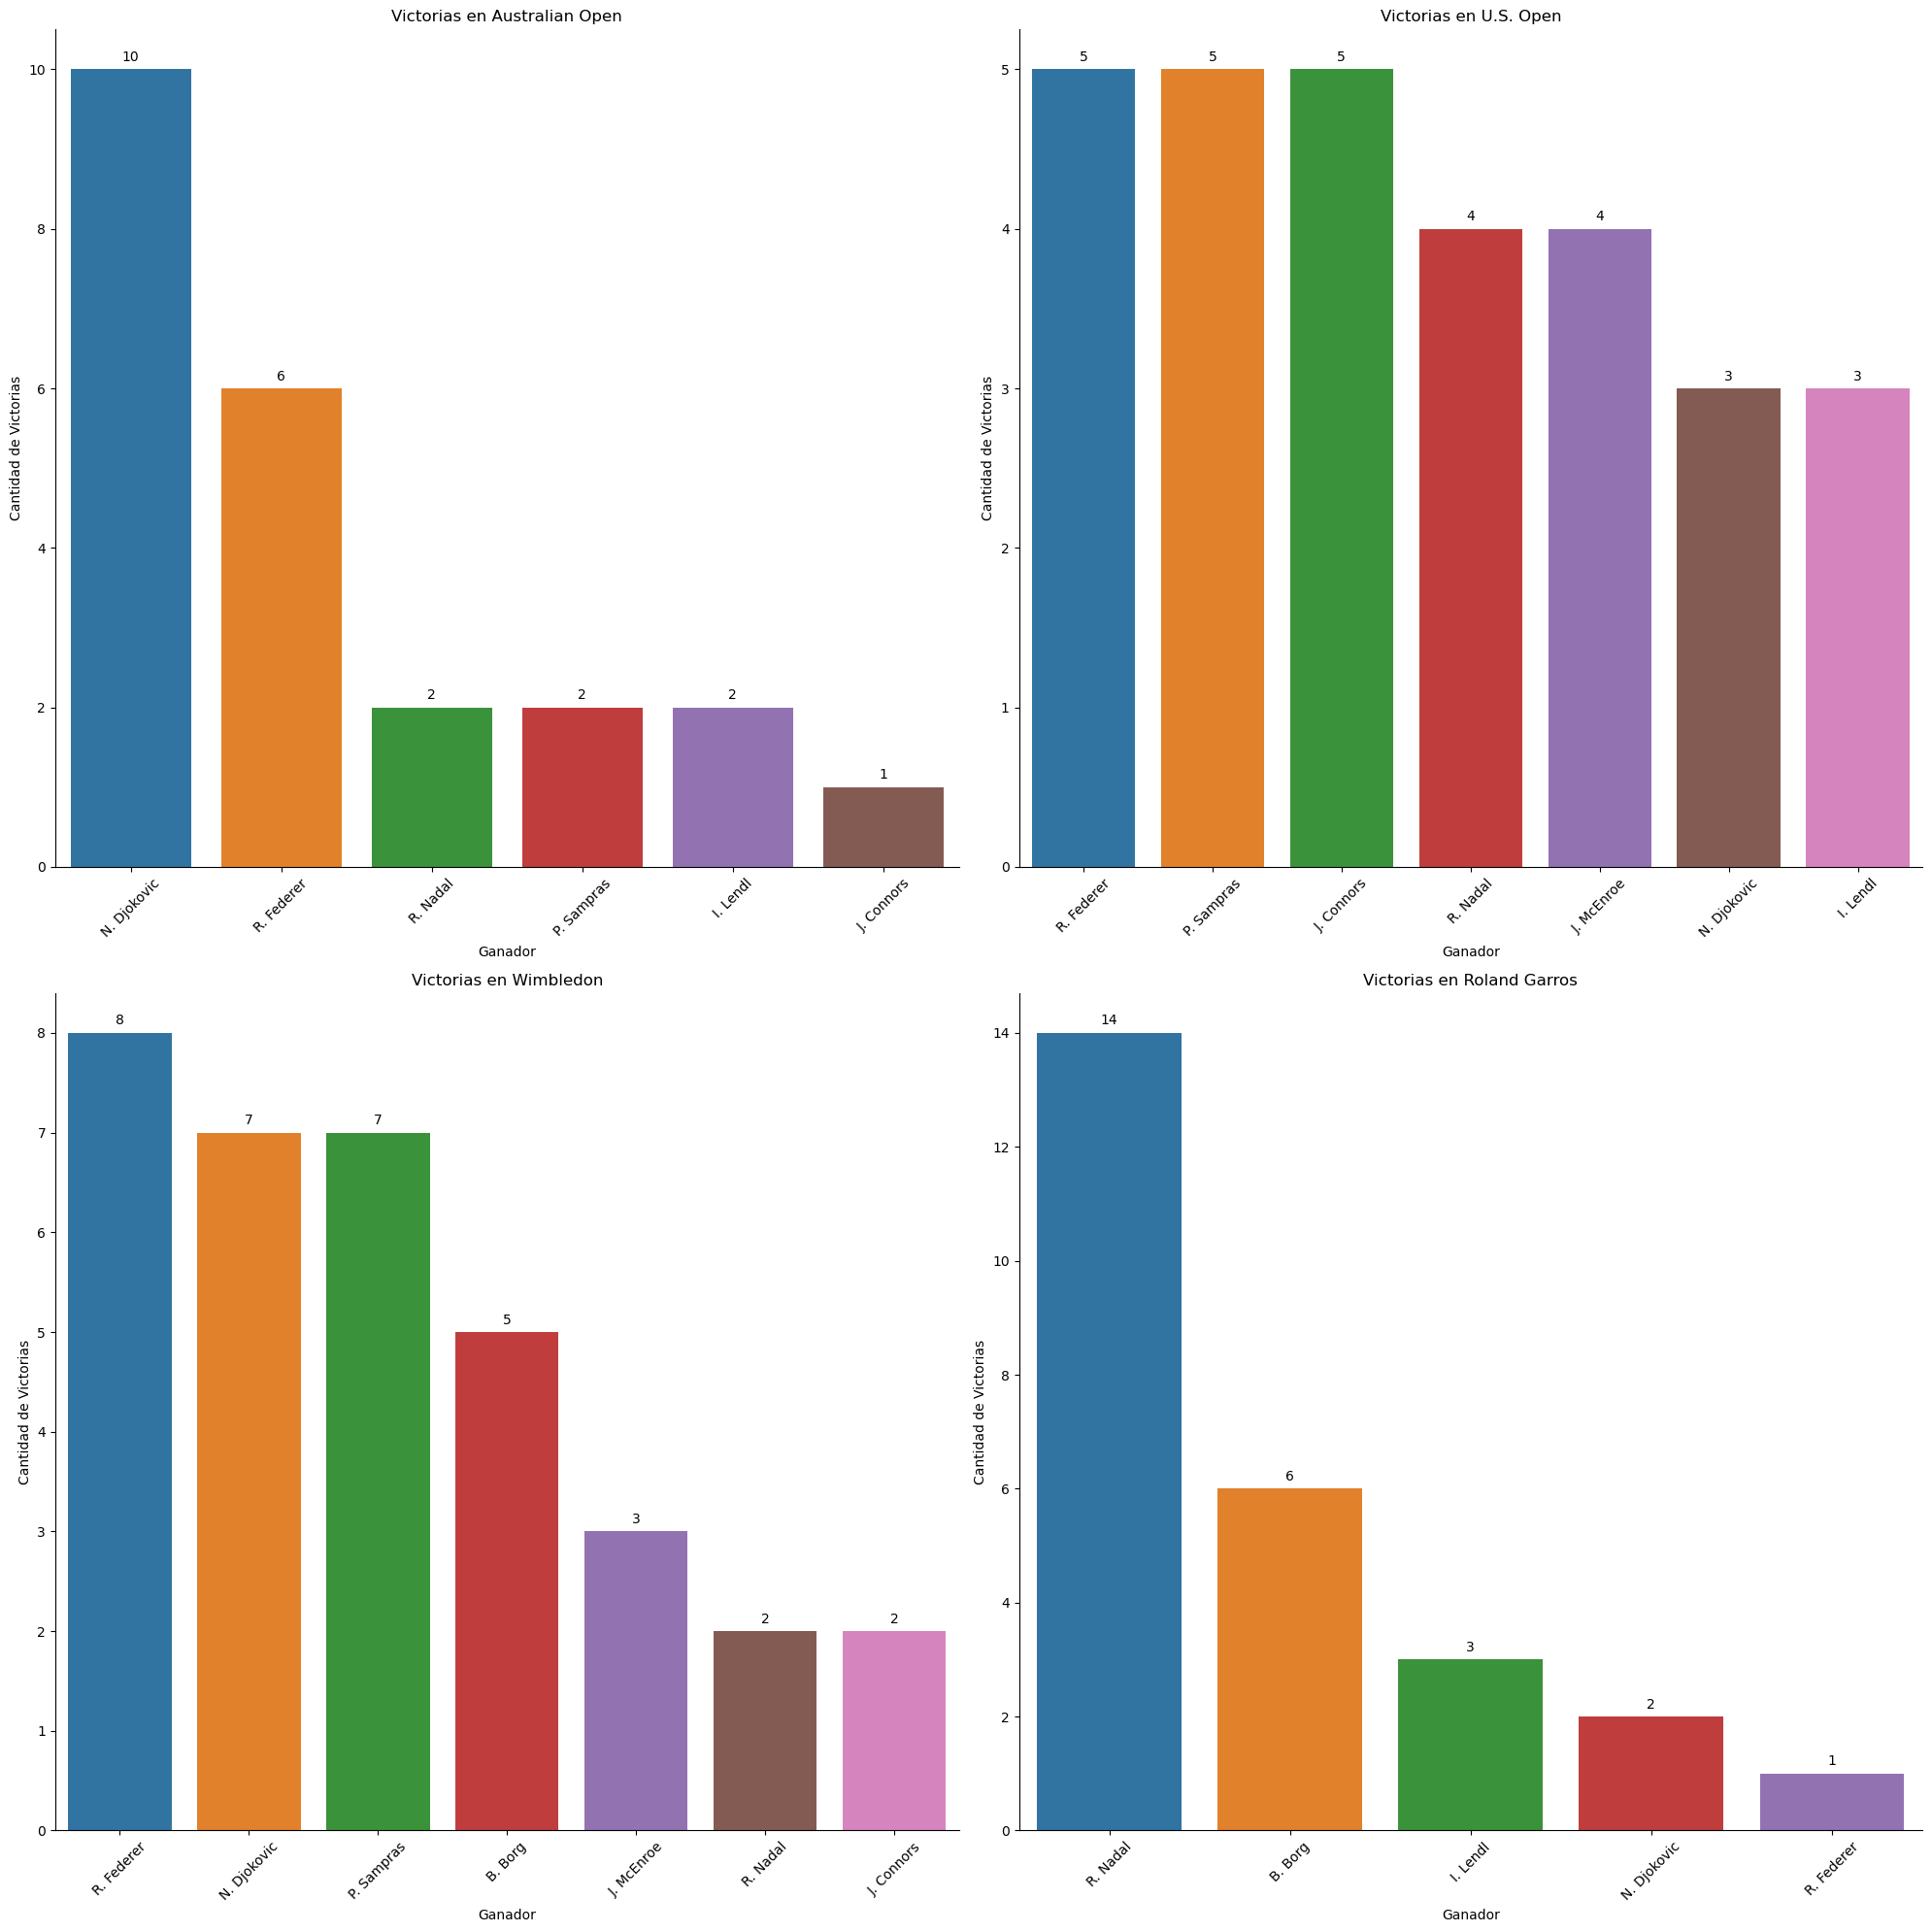

In [38]:
# Figura con varios subgráficos (uno por torneo) en un arreglo de 2x2.
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20), constrained_layout=True)

# Lista de los torneos únicos, y ajusta según necesites mostrar solo cuatro o manejar más torneos.
tournaments = df_majors['TOURNAMENT'].unique()[:4]  

# Gráfico para cada uno.
for ax, tournament in zip(axes.flatten(), tournaments):

    # Jugadores que están en los 10 primeros.
    tournament_df = df_top_winners[df_top_winners['TOURNAMENT'] == tournament]

    # Victorias por cada uno de los jugadores top y ordena de mayor a menor.
    winner_order = tournament_df['WINNER'].value_counts().index
    
    # Crea el countplot.
    sns.countplot(x = 'WINNER', data = tournament_df, ax=ax, order=winner_order)
    
    # Título del subgráfico 
    ax.set_title(f'Victorias en {tournament}')
    ax.set_xlabel('Ganador')
    ax.set_ylabel('Cantidad de Victorias')

    # Rota 
    ax.set_xticklabels(winner_order, rotation=45)

    # Añadir los valores 
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
        
    # Quitar las líneas superior y derecha.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Se da la circunstancia que en todo los majors, siempre hay un numero de ganadores que se repiten con bastante frecuencia, destacando en particular los casos de Rafa Nadal con Roland Garros y Novak Djokovic en el Australian Open, y sobre todo Nadal con sus 14 victorias destacando sus 6 victorias consecutivas (201-2022)

## Hipotesis 3 - Jugadores con mas Grand Slams

In [39]:
# Agrupar por ganador y contar el número total de victorias
total_wins = df_majors.groupby('WINNER').size().reset_index(name='Total Wins')

In [40]:
# Ordenar los jugadores por el número total de victorias, de mayor a menor
top_winners = total_wins.sort_values(by='Total Wins', ascending=False)

In [41]:
# Visualizar los top 10 jugadores con más victorias totales
top_10_winners = top_winners.head(10)
top_10_winners

,WINNER,Total Wins
43,R. Nadal,22
36,N. Djokovic,22
41,R. Federer,20
40,P. Sampras,14
8,B. Borg,11
0,A. Agassi,8
20,J. Connors,8
18,I. Lendl,8
35,M. Wilander,7
25,J. McEnroe,7


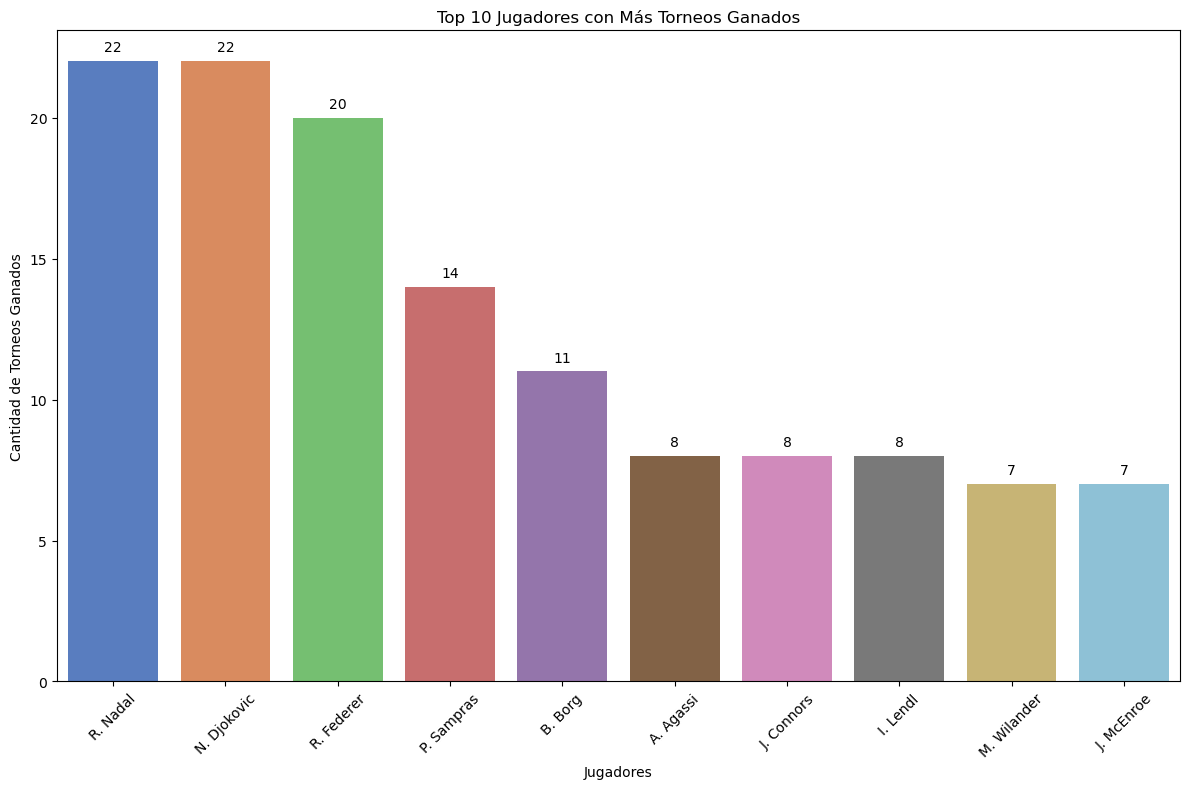

In [42]:
# Crear un gráfico de barras para visualizar los datos
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='WINNER', y='Total Wins', data=top_10_winners, palette='muted')
plt.title('Top 10 Jugadores con Más Torneos Ganados')
plt.xlabel('Jugadores')
plt.ylabel('Cantidad de Torneos Ganados')
plt.xticks(rotation=45)
plt.tight_layout()

# Añadir valores 
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.show()

In [43]:
# Tomamos solo los 10 jugadores con más victorias.
top_10_repeated_winners = top_repeated_winners.head(10)
top_10_repeated_winners

,WINNER,COUNTS
17,R. Nadal,22
13,N. Djokovic,22
16,R. Federer,19
15,P. Sampras,14
3,B. Borg,11
6,I. Lendl,8
10,J. McEnroe,7
7,J. Connors,7


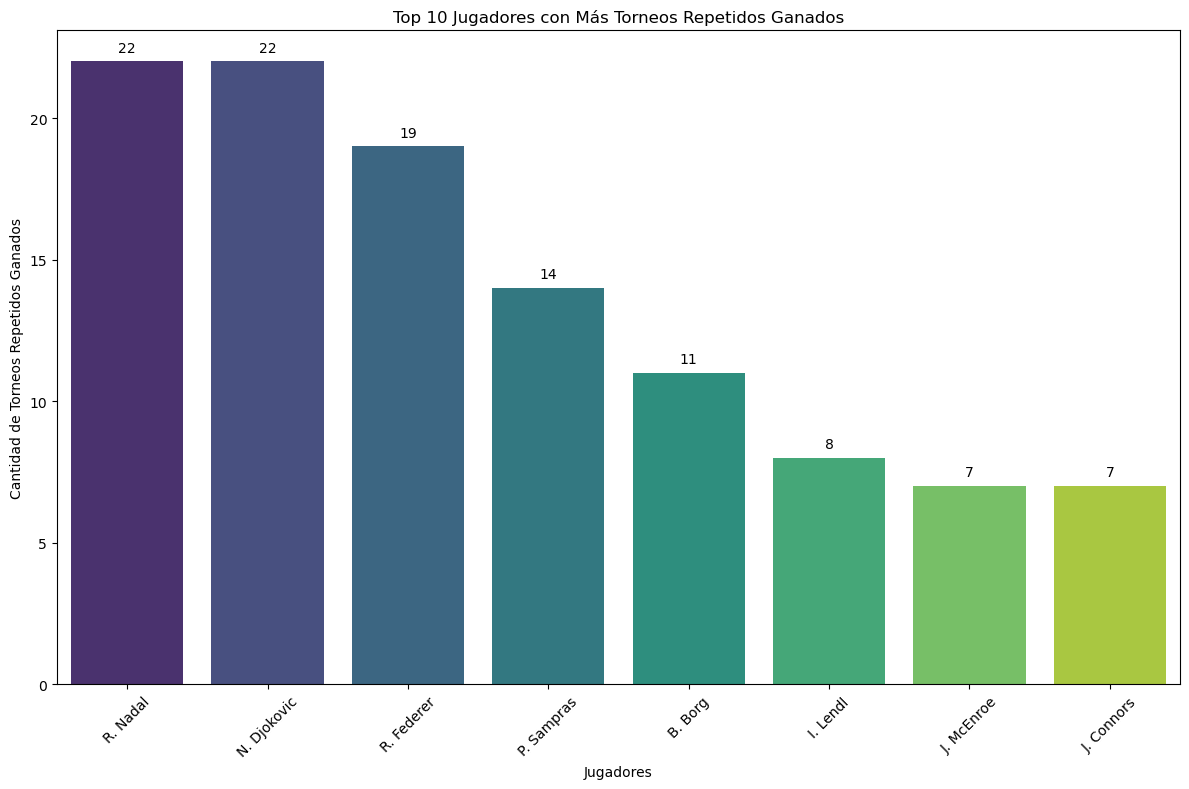

In [44]:
# Crear un gráfico de barras utilizando seaborn para visualizar a los jugadores con más victorias repetidas.
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='WINNER', y='COUNTS', data=top_10_repeated_winners, palette='viridis')
plt.title('Top 10 Jugadores con Más Torneos Repetidos Ganados')
plt.xlabel('Jugadores')
plt.ylabel('Cantidad de Torneos Repetidos Ganados')
plt.xticks(rotation=45)
plt.tight_layout()

# Añadir valores encima de cada barra
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.show()


### Los jugadores con mas torneos repetidos han sido Nada y Djokovic empatados a 22 torneos repetidos, seguido de Federer que completa el podium

In [45]:
selected_players = ['R. Nadal', 'N. Djokovic', 'R. Federer']
df_selected = df_majors[df_majors['WINNER'].isin(selected_players)]

In [46]:
# Agrupar por jugador y torneo, y contar las victorias
player_tournament_wins = df_selected.groupby(['WINNER', 'TOURNAMENT']).size().reset_index(name='Total Wins')

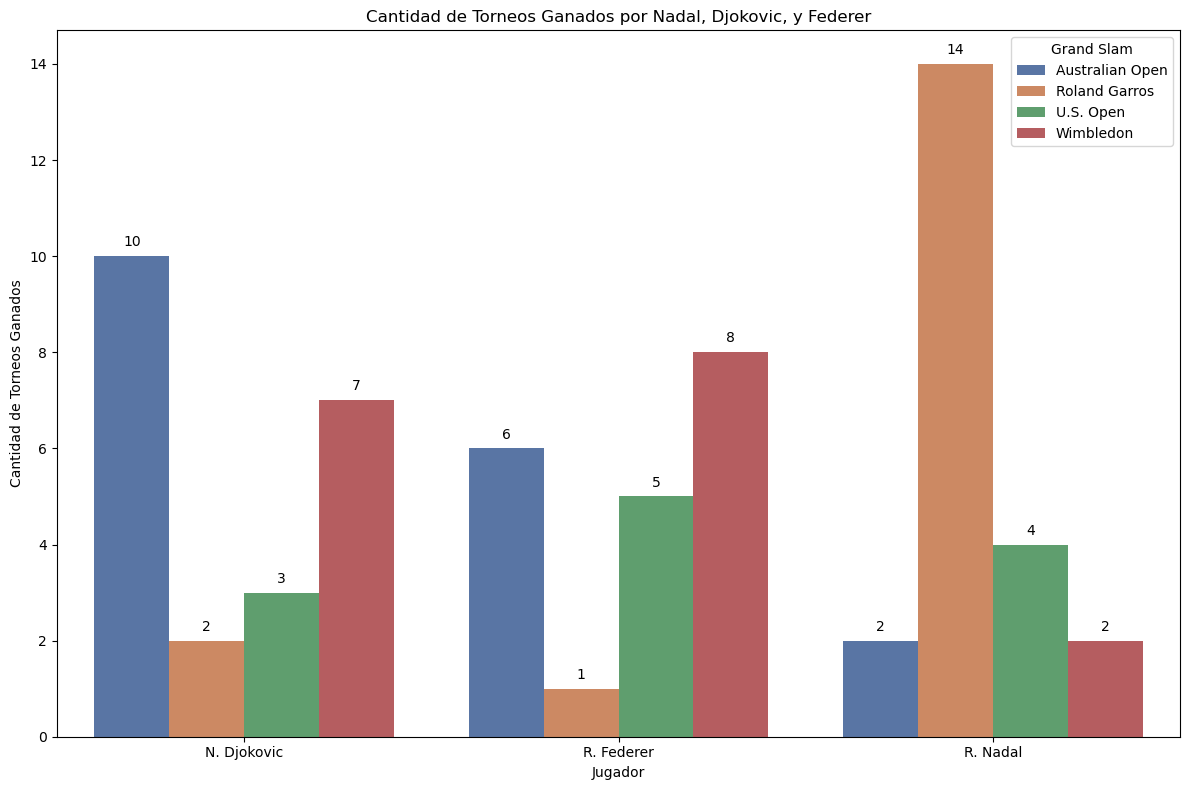

In [47]:
# Crear un gráfico de barras 
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='WINNER', y='Total Wins', hue='TOURNAMENT', data=player_tournament_wins, palette='deep')
plt.title('Cantidad de Torneos Ganados por Nadal, Djokovic, y Federer')
plt.xlabel('Jugador')
plt.ylabel('Cantidad de Torneos Ganados')
plt.legend(title = 'Grand Slam')
plt.tight_layout()

# Añadir valores 
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.show()

### Es importante destacar el dominio de Rafa Nadal en la tierra batida, es significativamente superior a cualquier otro jugador, con lo que le ha llevado a ser nombrado "Rey de la tierra batida", al igual que Nadal destaca en tierra, Djokovic lo hace en Australia y Federer en Winbledon por lo que esto refleja que cado uno de los jugadores tiene una superficie en la que destaca excepcionalmente. 

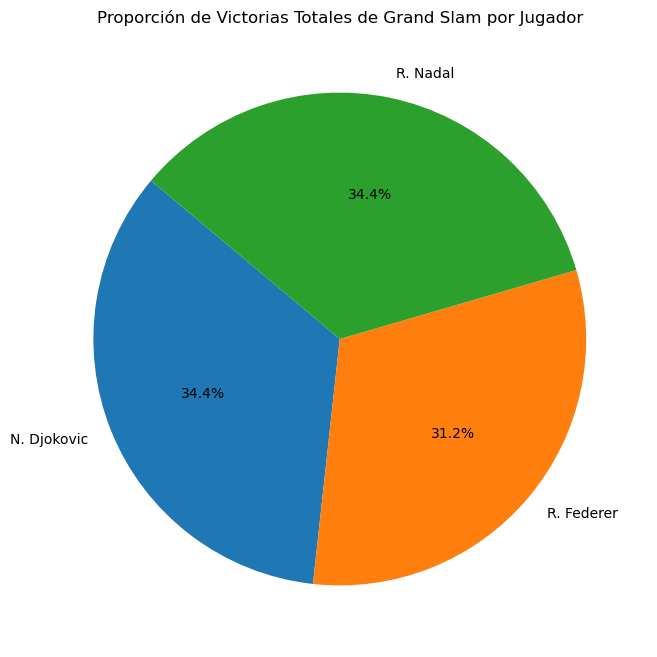

In [48]:
# Proporcion de victorias en Grand slam
total_wins_by_player = player_tournament_wins.groupby('WINNER')['Total Wins'].sum()

# Gráfico de tarta con estas sumas totales.
plt.figure(figsize=(8, 8))
plt.pie(total_wins_by_player, labels=total_wins_by_player.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Victorias Totales de Grand Slam por Jugador')
plt.show()


### Jugadores que han jugado mas finales 

In [58]:
# Ganadores y subcampeones 
finalists = pd.concat([df_majors['WINNER'], df_majors['RUNNER-UP']])

In [62]:
# Contar las apariciones de cada jugador en finales.
finals_count = finalists.value_counts().reset_index()
finals_count.columns = ['PLAYER', 'FINALS_PLAYED']
# Ordenar los jugadores por el número de finales jugadas y obtener los primeros 10
top_finalists = finals_count.head(10)
top_finalists

,PLAYER,FINALS_PLAYED
0,N. Djokovic,33
1,R. Federer,31
2,R. Nadal,30
3,I. Lendl,19
4,P. Sampras,18
5,B. Borg,16
6,J. Connors,15
7,A. Agassi,15
8,S. Edberg,11
9,M. Wilander,11


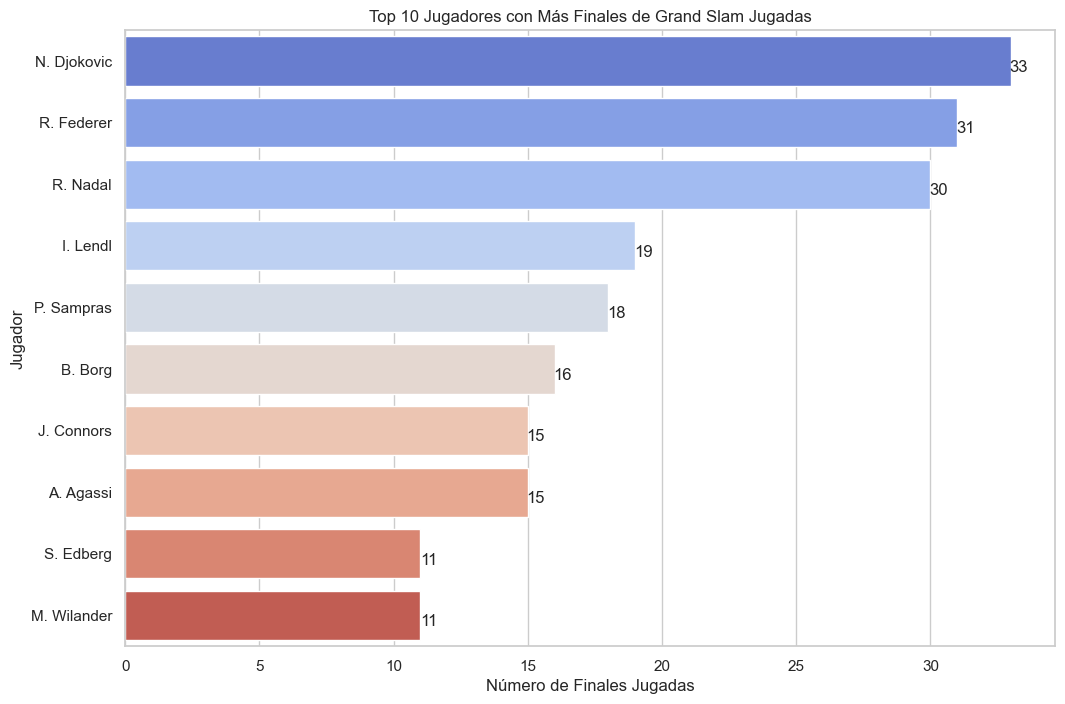

In [64]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura y el eje
plt.figure(figsize=(12, 8))

# Gráfico de barras
ax = sns.barplot(x='FINALS_PLAYED', y='PLAYER', data=top_finalists, palette='coolwarm')

# Añadir etiquetas y título
ax.set_title('Top 10 Jugadores con Más Finales de Grand Slam Jugadas')
ax.set_xlabel('Número de Finales Jugadas')
ax.set_ylabel('Jugador')

# Mostrar los valores 
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.3, p.get_y() + p.get_height() / 2 + 0.1,
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.show()

## Hipotesis 4 - Jugador que más tiempo ha estado en el Top 1 y en el Top 10 

In [69]:
# Extraer solo la fila donde 'Posicion' es 1 (número uno del mundo)
top_ranked_each_year = df_ATP_1973_to_2010[df_ATP_1973_to_2010['Posicion'] == 1]

# Contar cuántas veces cada jugador ha sido número uno al final del año
number_one_counts = top_ranked_each_year.iloc[0, 1:].value_counts().reset_index()
number_one_counts.columns = ['Player', 'Terminan_año_No_1']

# Ordenar los jugadores por la cantidad de años que terminaron como número uno
number_one_counts_sorted = number_one_counts.sort_values(by='Terminan_año_No_1', ascending=False)
number_one_counts_sorted

,Player,Terminan_año_No_1
0,J. Connors,6
1,P. Sampras,6
2,R. Federer,6
3,N. Djokovic,6
4,I. Lendl,4
5,R. Nadal,4
6,J. McEnroe,3
7,S. Edberg,3
8,B. Borg,2
9,A. Agassi,2


In [72]:
# Extraer las filas correspondientes a las 10 primeras posiciones de cada año
top_ten_each_year = df_ATP_1973_to_2010[df_ATP_1973_to_2010['Posicion'] <= 10]

# Concatenar todos los jugadores de las primeras 10 posiciones de cada columna (año)
top_ten_players = pd.concat([top_ten_each_year[year] for year in top_ten_each_year.columns if year.isdigit()])

# Contar las apariciones y resetear el índice para un mejor formato de DataFrame
top_ten_counts = top_ten_players.value_counts().reset_index()
top_ten_counts.columns = ['Player', 'Años_en_Top_10']

# Ordenar los jugadores por la cantidad de años que estuvieron en el Top 10
top_ten_sorted = top_ten_counts.sort_values(by='Años_en_Top_10', ascending=False)
top_ten_sorted.head(10)  


,Player,Años_en_Top_10
0,R. Federer,17
2,A. Agassi,16
1,J. Connors,16
3,R. Nadal,15
4,I. Lendl,13
5,N. Djokovic,13
6,B. Becker,12
7,P. Sampras,12
8,G. Vilas,10
9,S. Edberg,10


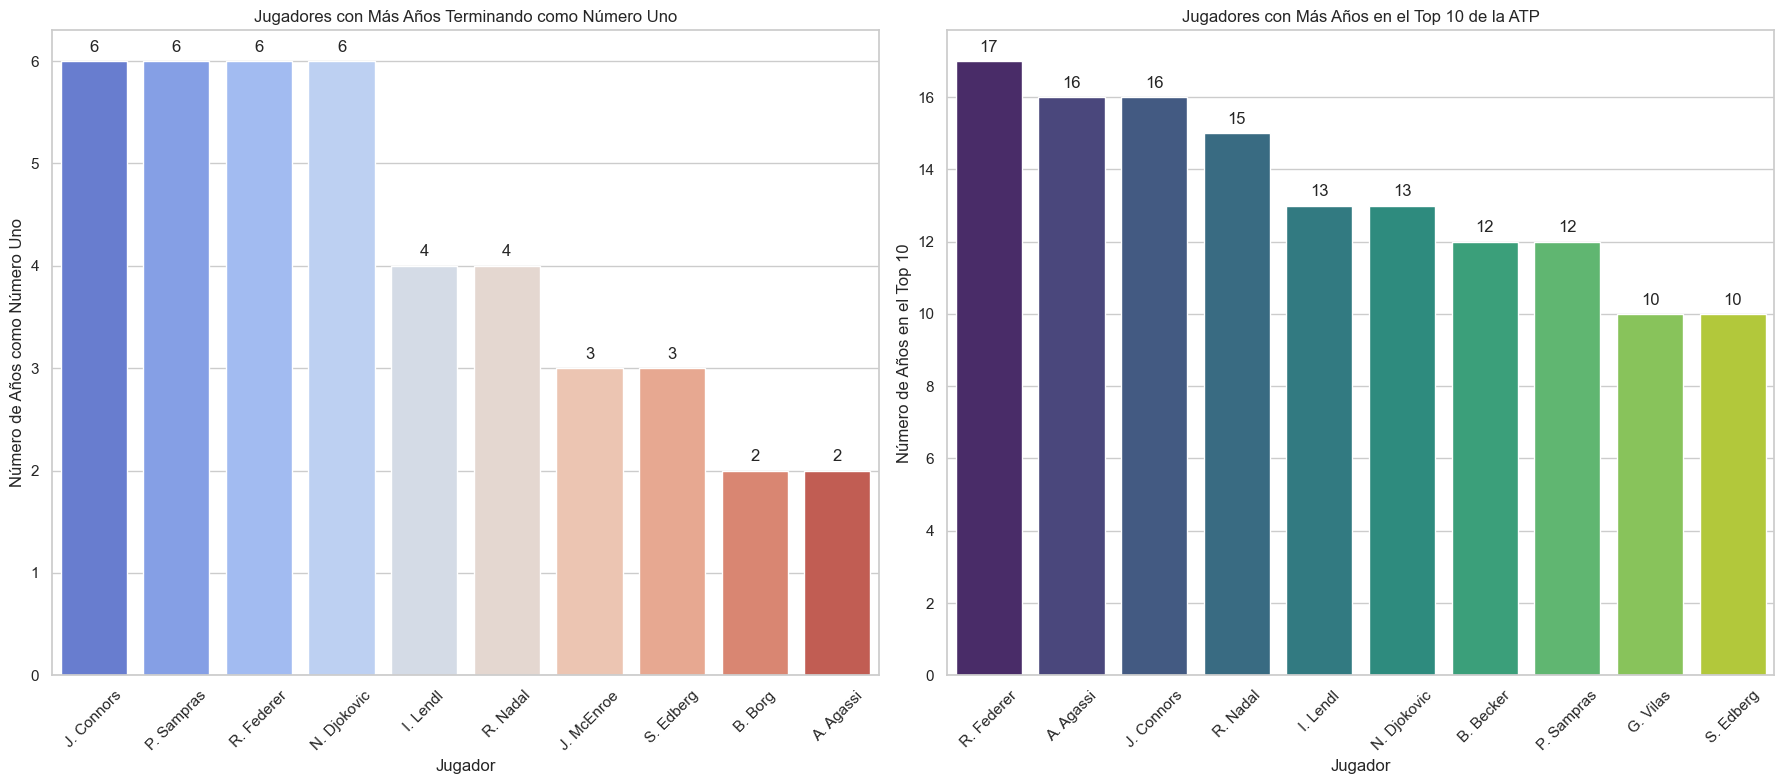

In [80]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Jugadores con más años terminando como número uno
ax1 = sns.barplot(x='Player', y='Terminan_año_No_1', data=number_one_counts_sorted.head(10), 
            palette='coolwarm', ax=axes[0])
axes[0].set_title('Jugadores con Más Años Terminando como Número Uno')
axes[0].set_ylabel('Número de Años como Número Uno')
axes[0].set_xlabel('Jugador')
axes[0].tick_params(axis='x', rotation=45)

# Añadir etiquetas
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), textcoords='offset points')

# Jugadores con más años en el Top 10
ax2 = sns.barplot(x='Player', y='Años_en_Top_10', data=top_ten_sorted.head(10), 
            palette='viridis', ax=axes[1])
axes[1].set_title('Jugadores con Más Años en el Top 10 de la ATP')
axes[1].set_ylabel('Número de Años en el Top 10')
axes[1].set_xlabel('Jugador')
axes[1].tick_params(axis='x', rotation=45)

# Añadir etiquetas
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.show()

## Hipótesis - Existe una fuerte correlación entre terminar el año en la posición número uno y la cantidad de títulos de Grand Slam ganados ese año.

In [85]:
# # Jugadores que fueron número uno cada año
# number_one_players = df_ATP_1973_to_2010[df_ATP_1973_to_2010['Posicion'] == 1].iloc[0, 1:]
# number_one_players

1973     I. Nastase
1974     J. Connors
1975     J. Connors
1976     J. Connors
1977     J. Connors
1978     J. Connors
1979        B. Borg
1980        B. Borg
1981     J. McEnroe
1982     J. Connors
1983     J. McEnroe
1984     J. McEnroe
1985       I. Lendl
1986       I. Lendl
1987       I. Lendl
1988    M. Wilander
1989       I. Lendl
1990      S. Edberg
1991      S. Edberg
1992      S. Edberg
1993     P. Sampras
1994     P. Sampras
1995      A. Agassi
1996     P. Sampras
1997     P. Sampras
1998     P. Sampras
1999      A. Agassi
2000     P. Sampras
2001     G. Kuerten
2002      L. Hewitt
2003     J. Ferrero
2004     R. Federer
2005     R. Federer
2006     R. Federer
2007     R. Federer
2008       R. Nadal
2009     R. Federer
2010       R. Nadal
2011    N. Djokovic
2012     R. Federer
2013    N. Djokovic
2014    N. Djokovic
2015    N. Djokovic
2016    N. Djokovic
2017       R. Nadal
2018       R. Nadal
2019    N. Djokovic
Name: 0, dtype: object

In [88]:
# # Preparar los datos de Grand Slam para contabilizar los títulos por año y jugador
# grand_slam_winners = df_majors.groupby(['YEAR', 'WINNER']).size().reset_index(name='GS_TITLES')
# grand_slam_winners

,YEAR,WINNER,GS_TITLES
0,1973,I. Nastase,1
1,1973,J. Kodes,1
2,1973,J. Newcombe,2
3,1974,B. Borg,1
4,1974,J. Connors,3
...,...,...,...
148,2021,N. Djokovic,3
149,2022,C. Alcaraz,1
150,2022,N. Djokovic,1
151,2022,R. Nadal,2


In [100]:
number_one_players = df_ATP_1973_to_2010.iloc[0, 1:].reset_index()
number_one_players.columns = ['YEAR', 'PLAYER']
number_one_players['YEAR'] = number_one_players['YEAR'].astype(int)  


In [101]:
# Preparar df_tennis para contabilizar los títulos por jugador y año
grand_slam_winners = df_majors.groupby(['YEAR', 'WINNER']).size().reset_index(name='GS_TITLES')
grand_slam_winners['YEAR'] = grand_slam_winners['YEAR'].astype(int) 


In [102]:
# Haciendo el merge de los dataframes sobre las columnas 'YEAR' y 'PLAYER'
combined_data = pd.merge(number_one_players, grand_slam_winners, left_on=['YEAR', 'PLAYER'], right_on=['YEAR', 'WINNER'], how='left')
combined_data['GS_TITLES'] = combined_data['GS_TITLES'].fillna(0) 

# Calcular la correlación
correlation = combined_data['GS_TITLES'].corr(combined_data['YEAR'].astype(float))
print(f"La correlación entre ser número uno y ganar Grand Slams el mismo año es: {correlation}")

La correlación entre ser número uno y ganar Grand Slams el mismo año es: 0.26846826425789894


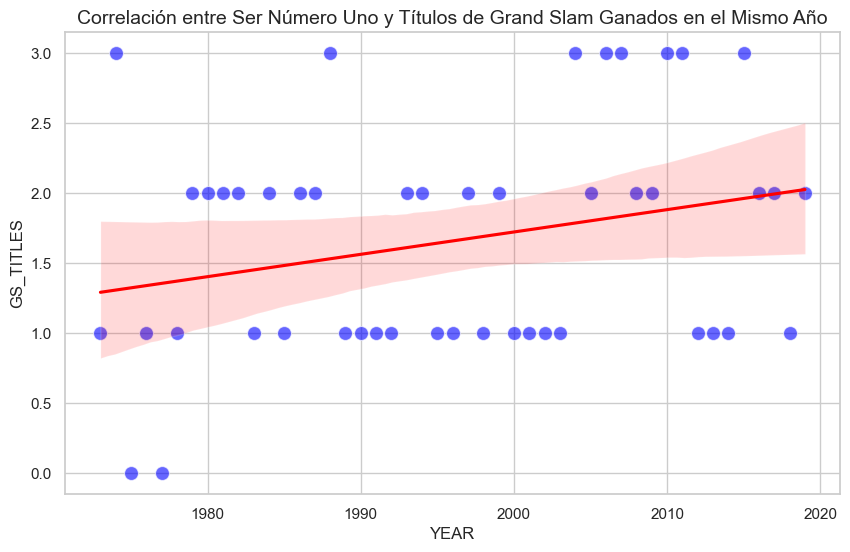

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de tener el DataFrame 'combined_data' con las columnas 'GS_TITLES' y 'YEAR' adecuadamente preparadas.
# combined_data debería tener una columna 'GS_TITLES' con los títulos ganados y una columna 'YEAR' para el año correspondiente.

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YEAR', y='GS_TITLES', data=combined_data, s=100, color='blue', alpha=0.6)

# Añadir títulos y etiquetas
plt.title('Correlación entre Ser Número Uno y Títulos de Grand Slam Ganados en el Mismo Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Títulos de Grand Slam', fontsize=12)

# Mostrar la línea de tendencia
sns.regplot(x='YEAR', y='GS_TITLES', data=combined_data, scatter=False, color='red')

plt.grid(True)
plt.show()


#### Hipótesis: Los jugadores zurdos tienen una ventaja en ciertas superficies o torneos específicos debido a su estilo de juego único

In [108]:
# Agrupar por mano dominante y contar victorias
mano_dominante = df_majors.groupby('WINNER_LEFT_OR_RIGHT_HANDED')['TOURNAMENT'].count().reset_index()
mano_dominante.columns = ['Mano', 'Victorias']
mano_dominante

,Mano,Victorias
0,left,47
1,right,152


In [113]:
# Agrupar por superficie y mano dominante y contar victorias
superficie = df_majors.groupby(['TOURNAMENT_SURFACE', 'WINNER_LEFT_OR_RIGHT_HANDED'])['TOURNAMENT'].count().reset_index()
superficie.columns = ['Superficie', 'Mano', 'Victorias']
superficie

,Superficie,Mano,Victorias
0,Clay,left,17
1,Clay,right,33
2,Clay - outdoors,left,3
3,DecoTurf - outdoors,left,11
4,DecoTurf - outdoors,right,34
5,Grass,left,4
6,Grass,right,10
7,Grass / Outdoor,left,8
8,Grass / Outdoor,right,41
9,Plexicushion Prestige,left,2


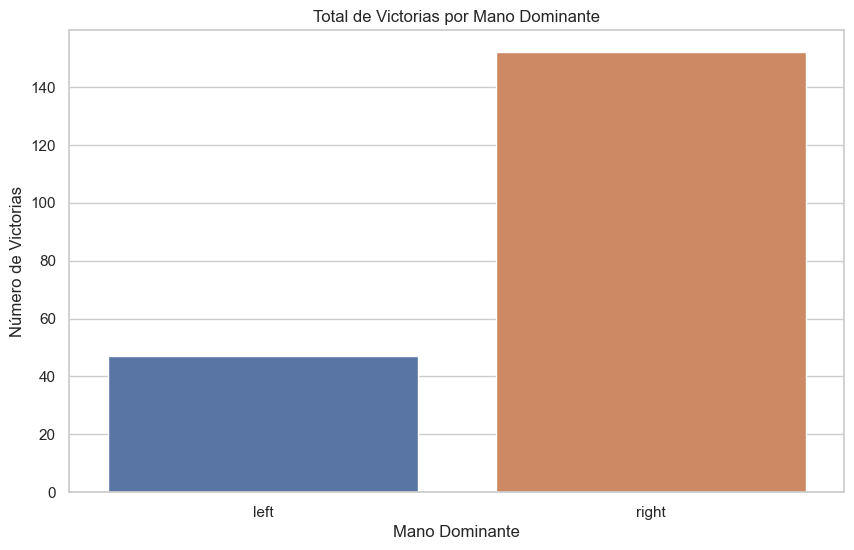

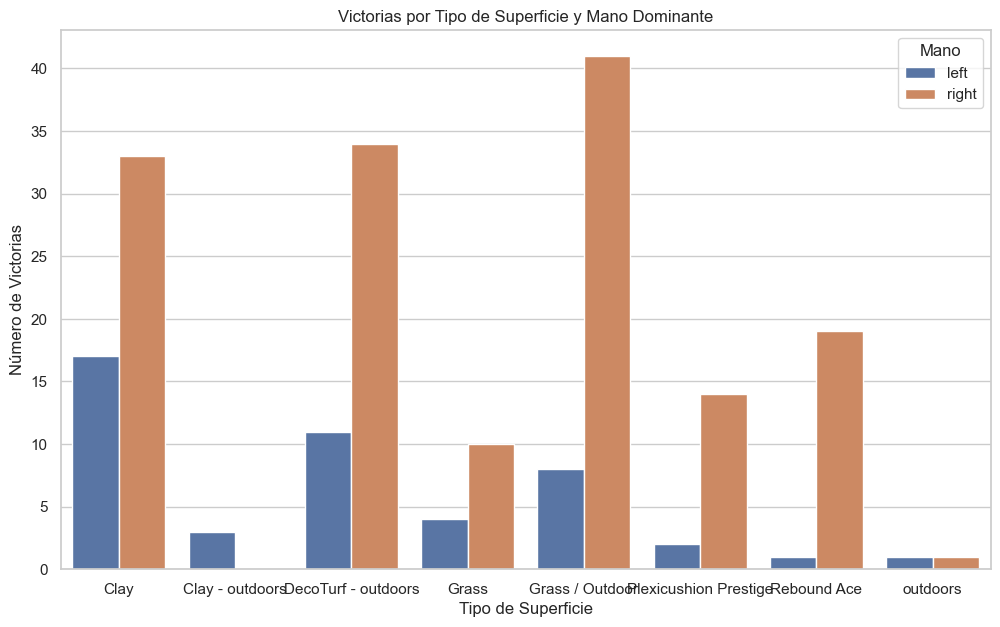

In [114]:

# Gráfico para análisis general
plt.figure(figsize=(10, 6))
sns.barplot(x='Mano', y='Victorias', data = mano_dominante)
plt.title('Total de Victorias por Mano Dominante')
plt.ylabel('Número de Victorias')
plt.xlabel('Mano Dominante')

# Gráfico para análisis por superficie
plt.figure(figsize=(12, 7))
sns.barplot(x='Superficie', y='Victorias', hue='Mano', data = superficie)
plt.title('Victorias por Tipo de Superficie y Mano Dominante')
plt.ylabel('Número de Victorias')
plt.xlabel('Tipo de Superficie')

plt.show()